In [9]:
import os
import sys
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('..')
from db_connection.connection import PostgresConnection
from src.df_cleaner import *
from src.df_outlier_handler import OutlierHandler



In [10]:
import warnings
warnings.filterwarnings('ignore')


# Reading Data

In [11]:
missing_values = ["n/a", "na", "undefined"]
df = pd.read_excel("C:/Users/hp/Documents/10 academy/Week 4/data/Apollo android review data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              100 non-null    object        
 1   userName              100 non-null    object        
 2   userImage             100 non-null    object        
 3   👍                     100 non-null    int64         
 4   reviewCreatedVersion  72 non-null     object        
 5   at                    100 non-null    datetime64[ns]
 6   replyContent          0 non-null      float64       
 7   repliedAt             0 non-null      float64       
 8   appVersion            72 non-null     object        
 9   score                 100 non-null    int64         
 10  Comments              100 non-null    object        
 11  Keywords              50 non-null     object        
 12  LDA_Category          100 non-null    object        
 13  Sentiment            

# General Statistics


In [12]:
df.size

1500

In [13]:
df.shape

(100, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              100 non-null    object        
 1   userName              100 non-null    object        
 2   userImage             100 non-null    object        
 3   👍                     100 non-null    int64         
 4   reviewCreatedVersion  72 non-null     object        
 5   at                    100 non-null    datetime64[ns]
 6   replyContent          0 non-null      float64       
 7   repliedAt             0 non-null      float64       
 8   appVersion            72 non-null     object        
 9   score                 100 non-null    int64         
 10  Comments              100 non-null    object        
 11  Keywords              50 non-null     object        
 12  LDA_Category          100 non-null    object        
 13  Sentiment            

In [15]:
df.describe()

,👍,at,replyContent,repliedAt,score
count,100.000000,100,0.0,0.0,100.000000
mean,9.160000,2023-11-09 06:06:40.990000128,NaN,NaN,3.530000
min,0.000000,2023-10-09 10:44:00,NaN,NaN,1.000000
25%,0.000000,2023-10-25 18:18:54.750000128,NaN,NaN,1.750000
50%,0.000000,2023-11-09 18:23:58,NaN,NaN,5.000000
75%,1.000000,2023-11-25 15:13:10.249999872,NaN,NaN,5.000000
max,374.000000,2023-12-05 14:47:40,NaN,NaN,5.000000
std,45.394504,NaN,NaN,NaN,1.720083


# Missing Values

In [16]:
percent_missing_values(df)

The dataset contains 20.4 % missing values.


In [17]:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_dtype = df.dtypes

        mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values', 2: 'Dtype'})

        mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
             "There are " + str(mis_val_table_ren_columns.shape[0]) +
             " columns that have missing values.")

        return mis_val_table_ren_columns
print(f"Missing values: {missing_values_table(df)}")

Your selected dataframe has 15 columns.
There are 5 columns that have missing values.
Missing values:                       Missing Values  % of Total Values    Dtype
replyContent                     100              100.0  float64
repliedAt                        100              100.0  float64
Keywords                          50               50.0   object
reviewCreatedVersion              28               28.0   object
appVersion                        28               28.0   object


In [18]:
percent_missing_values(df)

The dataset contains 20.4 % missing values.


In [19]:
df.isnull().sum()

reviewId                  0
userName                  0
userImage                 0
👍                         0
reviewCreatedVersion     28
at                        0
replyContent            100
repliedAt               100
appVersion               28
score                     0
Comments                  0
Keywords                 50
LDA_Category              0
Sentiment                 0
Insight                   0
dtype: int64

In [20]:
df.isnull().sum().sum()

306

In [25]:
df = df.fillna(value = 0)
df

,reviewId,userName,userImage,👍,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,score,Comments,Keywords,LDA_Category,Sentiment,Insight
0,910fa3ea-29db-4e6d-972b-83a7ccf0b381,Abnet Hussien,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 14:47:40,0.0,0.0,23.10.24,1,it fails proceeding after sending OTP for regi...,otp,Account and Identification Issues,Negative,Influential words: fails
1,1c92335c-20cf-4dc8-8108-40c5ca406669,Paul Flower,https://play-lh.googleusercontent.com/a-/ALV-U...,0,0,2023-12-05 13:45:23,0.0,0.0,0,4,"I like all features of this app but, airtime t...",like,Operational Challenges within the App,Neutral,No significant influential words
2,1d9285f6-3570-43b1-b649-dfbffa671471,Fenkl Massawa (fenkl),https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 12:41:48,0.0,0.0,23.10.24,5,I like this app,like,Operational Challenges within the App,Neutral,No significant influential words
3,26a50719-d3b5-4703-a942-5640e04d824a,Mula Boad,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-05 11:55:36,0.0,0.0,23.10.24,5,Litterally i am well exprienced in social medi...,0,Functional Issues and User Experience,Neutral,"Influential words: social, new"
4,4f2712f8-4b7f-45e7-8afb-90556692a6b5,yegna gojo,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.10.24,2023-12-04 06:47:48,0.0,0.0,23.10.24,5,Good,good,Positive Feedback,Positive,Influential words: Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,cb3626c2-5f52-4fb6-a6ef-618bc5e1eed0,behailu besha,https://play-lh.googleusercontent.com/a/ACg8oc...,0,23.09.23,2023-10-10 08:00:59,0.0,0.0,23.09.23,5,Nice app,0,Operational Challenges within the App,Positive,Influential words: Nice
96,e97a1c48-dc08-446b-95ac-40625f3cd0e3,Bilal Kemal,https://play-lh.googleusercontent.com/a-/ALV-U...,0,23.09.23,2023-10-10 03:19:18,0.0,0.0,23.09.23,5,good,good,Positive Feedback,Positive,Influential words: good
97,68d16a53-83ca-493e-ad36-fc80adbf85d9,Biruh Aimero,https://play-lh.googleusercontent.com/a/ACg8oc...,0,23.08.03,2023-10-09 17:25:06,0.0,0.0,23.08.03,3,I like,like,Operational Challenges within the App,Neutral,No significant influential words
98,4c8dfb13-263f-424f-96e0-ab836bf81b23,Yonatan Hailu,https://play-lh.googleusercontent.com/a-/ALV-U...,0,0,2023-10-09 17:02:20,0.0,0.0,0,5,It's Good,good,Positive Feedback,Positive,Influential words: Good


In [26]:
percent_missing_values(df)

The dataset contains 0.0 % missing values.


# Univariate Analysis

In [35]:
unique_counts = df['score'].nunique()
unique_counts

5

# Experiment

In [36]:
counts_df = df['score'].value_counts()
counts_df

score
5    51
1    25
4     9
2     8
3     7
Name: count, dtype: int64

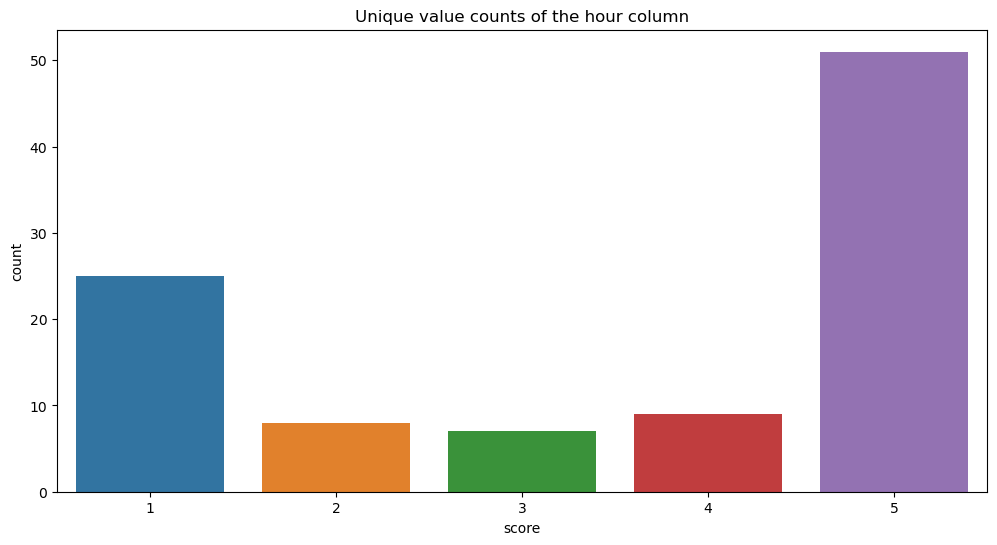

In [37]:
plt.figure(figsize=(12, 6))
plt.title('Unique value counts of the hour column')
sns.countplot(data=df, x='score')
plt.show()

In [41]:
df["at"] = pd.to_datetime(df["at"])
df["at"] 


0    2023-12-05 14:47:40
1    2023-12-05 13:45:23
2    2023-12-05 12:41:48
3    2023-12-05 11:55:36
4    2023-12-04 06:47:48
             ...        
95   2023-10-10 08:00:59
96   2023-10-10 03:19:18
97   2023-10-09 17:25:06
98   2023-10-09 17:02:20
99   2023-10-09 10:44:00
Name: at, Length: 100, dtype: datetime64[ns]

In [39]:
df.loc[:,"at"]

0    2023-12-05 14:47:40
1    2023-12-05 13:45:23
2    2023-12-05 12:41:48
3    2023-12-05 11:55:36
4    2023-12-04 06:47:48
             ...        
95   2023-10-10 08:00:59
96   2023-10-10 03:19:18
97   2023-10-09 17:25:06
98   2023-10-09 17:02:20
99   2023-10-09 10:44:00
Name: at, Length: 100, dtype: datetime64[ns]

In [43]:
counts_df = df['at'].value_counts()
counts_df

at
2023-12-05 14:47:40    1
2023-11-05 01:24:22    1
2023-10-26 06:25:48    1
2023-10-26 08:23:28    1
2023-10-28 04:27:01    1
                      ..
2023-11-22 10:03:41    1
2023-11-22 12:07:26    1
2023-11-23 15:36:22    1
2023-11-23 15:45:07    1
2023-10-09 10:44:00    1
Name: count, Length: 100, dtype: int64

# Bivariate Analysis

In [50]:
user_engagement_df = df[['reviewId', 'userName', 'score', 'Comments','Sentiment']]
user_engagement_df.head()


,reviewId,userName,score,Comments,Sentiment
0,910fa3ea-29db-4e6d-972b-83a7ccf0b381,Abnet Hussien,1,it fails proceeding after sending OTP for regi...,Negative
1,1c92335c-20cf-4dc8-8108-40c5ca406669,Paul Flower,4,"I like all features of this app but, airtime t...",Neutral
2,1d9285f6-3570-43b1-b649-dfbffa671471,Fenkl Massawa (fenkl),5,I like this app,Neutral
3,26a50719-d3b5-4703-a942-5640e04d824a,Mula Boad,5,Litterally i am well exprienced in social medi...,Neutral
4,4f2712f8-4b7f-45e7-8afb-90556692a6b5,yegna gojo,5,Good,Positive


In [51]:
outlier_handler = OutlierHandler(user_engagement_df)

<Axes: >

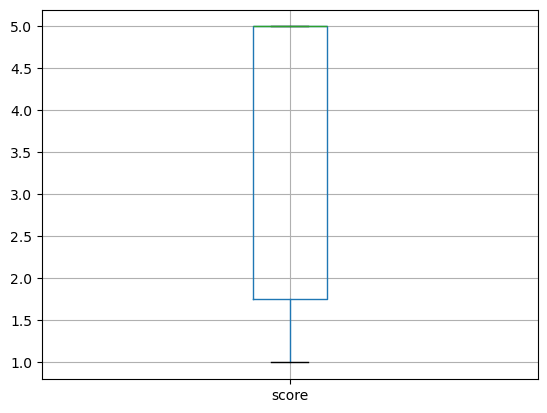

In [52]:
user_engagement_df.boxplot()